In [1]:
import csv
import requests
from bs4 import BeautifulSoup


def scrape_data(url):

    response = requests.get(url, timeout=10)
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find_all('table')[1]

    rows = table.select('tbody>tr')

   
    header = ['Districts','Confirmed','Deaths','Recovered','Readmitted']
   

    with open('records.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(header)
        for row in rows:
            data = [th.text.strip() for th in row.find_all('td')]
            writer.writerow(data)
            

            
if __name__=="__main__":
    url = "https://kathmandupost.com/covid19"
    scrape_data(url)

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import datetime
from plotly.subplots import make_subplots

import folium
from folium import plugins

from scipy.interpolate import interp1d
import plotly.express as px

In [3]:
corona = pd.read_csv('records.csv')
corona = corona.drop(['Readmitted'],axis=1)
corona.head()

Districts  Confirmed  Deaths  Recovered
0  Kathmandu      18875      94        110
1     Morang       3424      33        218
2      Parsa       2737      45        176
3  Rupandehi       2644      22        311
4    Sarlahi       2421       8        628

In [4]:
corona['Active']=corona['Confirmed']-(corona['Recovered']+corona['Deaths'])
corona.head()

Districts  Confirmed  Deaths  Recovered  Active
0  Kathmandu      18875      94        110   18671
1     Morang       3424      33        218    3173
2      Parsa       2737      45        176    2516
3  Rupandehi       2644      22        311    2311
4    Sarlahi       2421       8        628    1785

In [5]:
pyo.iplot([{
    'x' : corona.Districts,
    'y' : corona.Confirmed
}])

In [6]:
corona.loc[corona['Districts'] == 'Kathmandu']

Districts  Confirmed  Deaths  Recovered  Active
0  Kathmandu      18875      94        110   18671

In [7]:
corona.loc[corona['Districts']=='Tanahun']

Districts  Confirmed  Deaths  Recovered  Active
35   Tanahun        473       5        161     307

In [8]:
corona.loc[corona['Districts']=='Kaski']

Districts  Confirmed  Deaths  Recovered  Active
24     Kaski        973      11        104     858

In [9]:
corona.loc[corona['Districts']=='Lalitpur']

Districts  Confirmed  Deaths  Recovered  Active
6  Lalitpur       2346      20         30    2296

In [10]:
corona.loc[corona['Districts']=='Bhaktapur']

Districts  Confirmed  Deaths  Recovered  Active
9  Bhaktapur       2037      21         31    1985

In [11]:
current_status = {'Total confirmed':sum(corona['Confirmed']),
                  'Total Deaths':sum(corona['Deaths']),
                  'Total Recovered':sum(corona['Recovered']),
                  'Active Cases': sum(corona['Active'])
    
                }

In [12]:
current_status

{'Total confirmed': 76258,
 'Total Deaths': 491,
 'Total Recovered': 55371,
 'Active Cases': 20396}

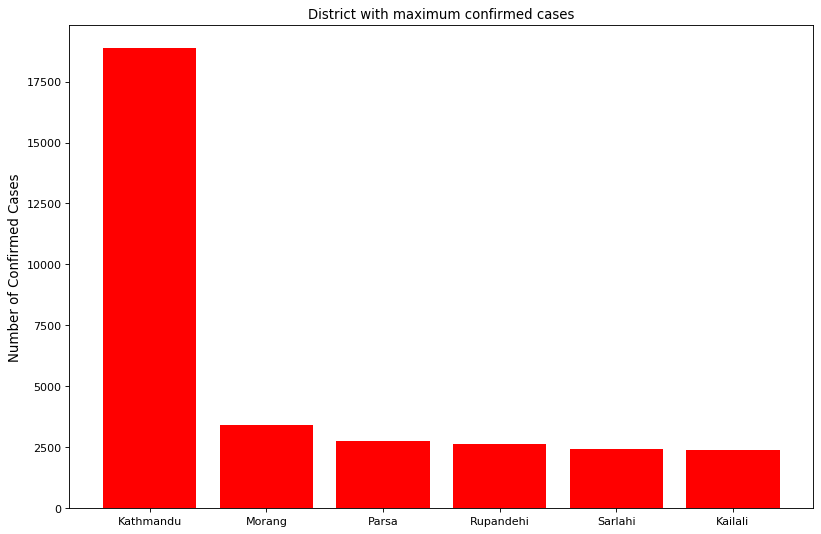

In [13]:
corona_latest = corona.sort_values(by=['Confirmed'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Confirmed'][:6], align='center', color='red')
plt.ylabel('Number of Confirmed Cases', size=12)
plt.title('District with maximum confirmed cases', size=12)
plt.show()

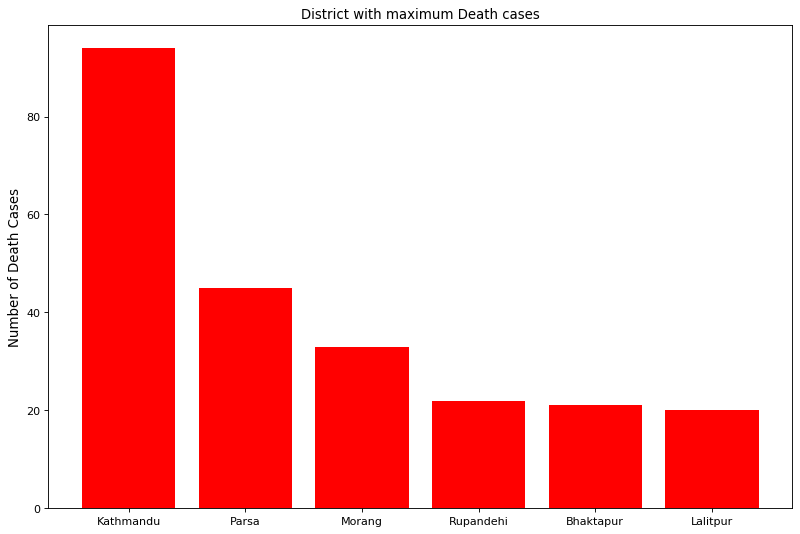

In [14]:
corona_latest = corona.sort_values(by=['Deaths'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Deaths'][:6], align='center', color='red')
plt.ylabel('Number of Death Cases', size=12)
plt.title('District with maximum Death cases', size=12)
plt.show()

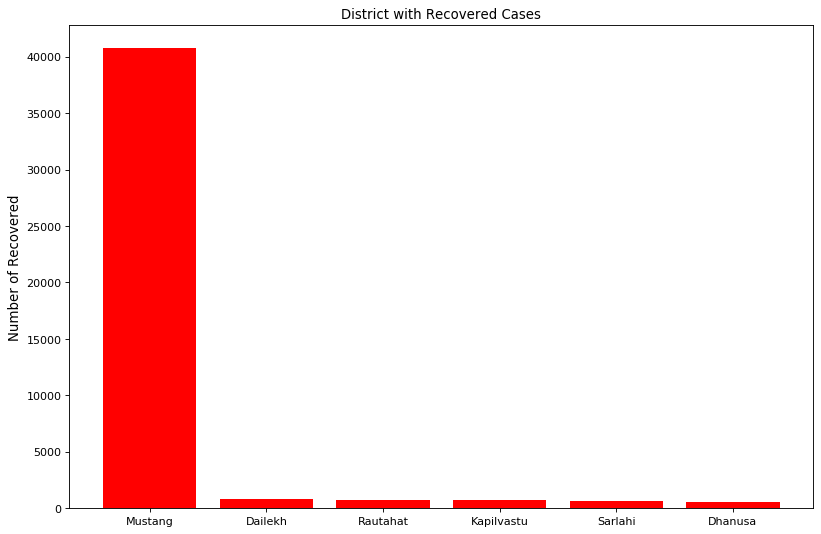

In [15]:
corona_latest = corona.sort_values(by=['Recovered'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Recovered'][:6], align='center', color='red')
plt.ylabel('Number of Recovered', size=12)
plt.title('District with Recovered Cases', size=12)
plt.show()

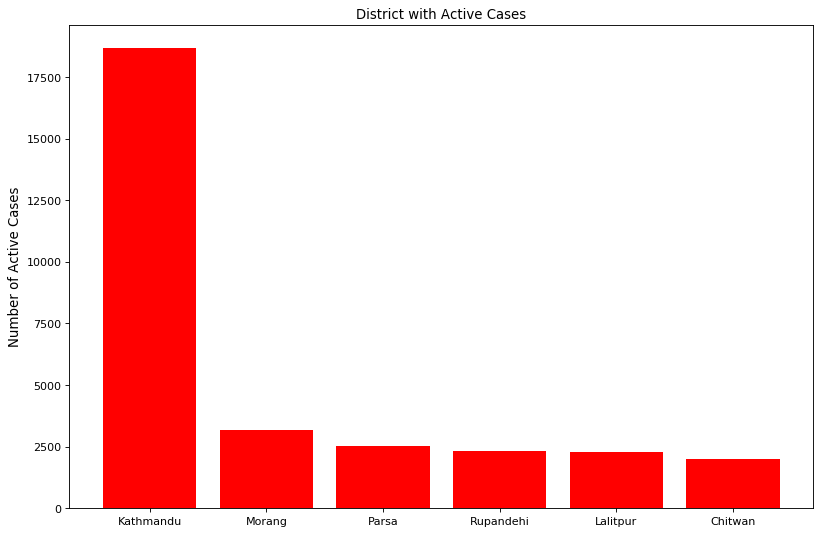

In [16]:
corona_latest = corona.sort_values(by=['Active'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Active'][:6], align='center', color='red')
plt.ylabel('Number of Active Cases', size=12)
plt.title('District with Active Cases', size=12)
plt.show()

In [17]:
coordinate = pd.read_csv('Districts-Coordinate.csv')
coordinate

Districts  Longitude  Latitude
0         Achham    81.2519   29.0396
1   Arghakhanchi    83.0361   27.9829
2        Baglung    83.2201   28.3491
3        Baitadi    80.4688   29.5186
4        Bajhang    81.2519   29.7767
..           ...        ...       ...
72       Syangja    83.8049   28.0197
73       Tanahun    84.2279   27.9447
74     Taplejung    87.7763   27.6257
75     Terhathum    87.5377   27.1508
76      Udayapur    86.7014   26.8998

[77 rows x 3 columns]

In [18]:
corona.style.background_gradient(cmap='Reds')

In [19]:
COVID19= pd.merge(corona,coordinate,on="Districts")
COVID19.head()

Districts  Confirmed  Deaths  Recovered  Active  Longitude  Latitude
0  Kathmandu      18875      94        110   18671    85.3240   27.7172
1     Morang       3424      33        218    3173    87.4604   26.6799
2      Parsa       2737      45        176    2516    84.8568   27.1736
3  Rupandehi       2644      22        311    2311    83.4463   27.5924
4    Sarlahi       2421       8        628    1785    85.5612   26.9627

In [20]:
list1 = corona.Confirmed.tolist()

m=interp1d([0,max(list1)],[5,18])

circle_radius = m(list1)

typelist=['open-street-map','white-bg','carto-positron','stamen-terrain','stamen-toner','stamen-watercolor']

for i in typelist:
    print(i)
    fig=px.density_mapbox(COVID19, lat='Latitude', lon='Longitude',hover_name='Districts', radius=circle_radius, zoom=6,title='COVID-19 map of Nepal', mapbox_style=i)
    fig.show()

open-street-map


white-bg


carto-positron


stamen-terrain


stamen-toner


stamen-watercolor


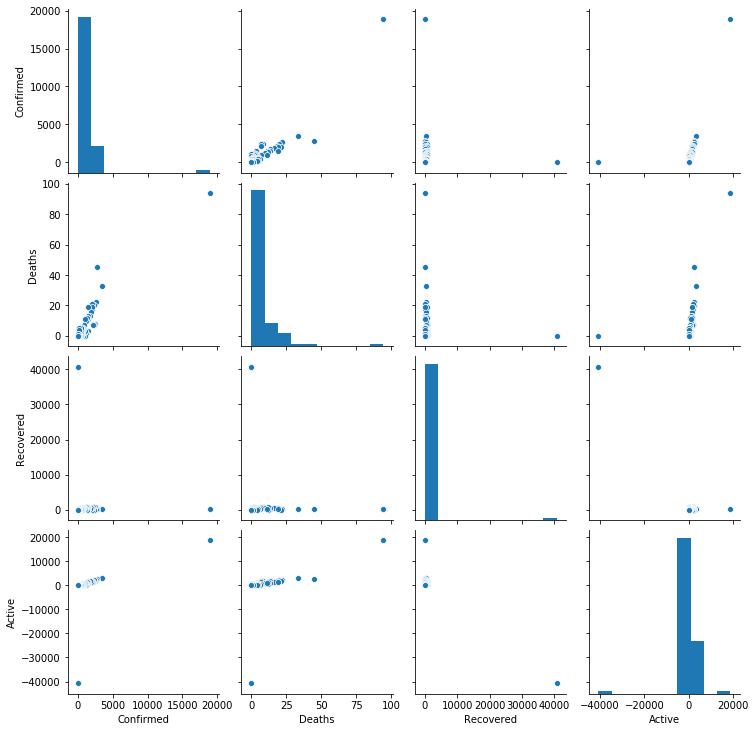

In [21]:
sns.pairplot(corona)

D:\installed-apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



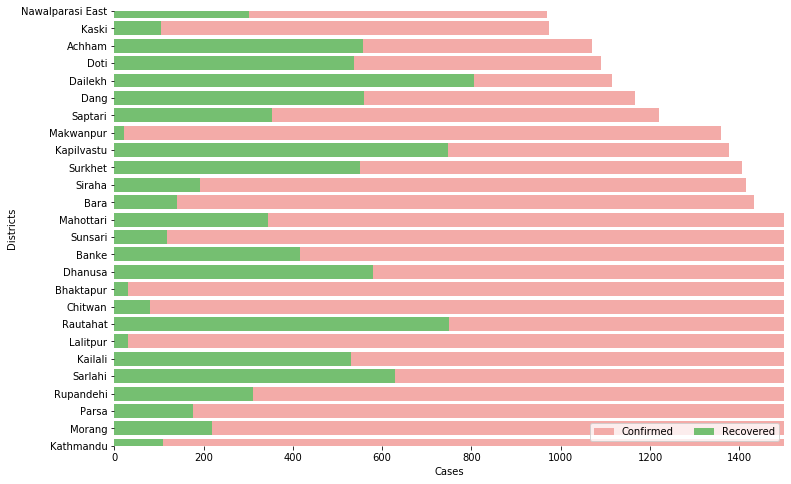

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
data = corona[['Districts','Confirmed','Recovered','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Districts", data=corona,label="Confirmed", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Districts", data=corona, label="Recovered", color="g")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500),ylim=(0,25), ylabel="Districts",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [23]:
fig = go.Figure(data=[go.Bar(
            x=corona['Districts'][0:10], y=corona['Confirmed'][0:10],
            text=corona['Confirmed'][0:10],
            textposition='auto',
            marker_color='blue',
            

        )])
fig.update_layout(
    title='Ten most infected Districts of Nepal',
    xaxis_title="Districts",
    yaxis_title="Confirmed Cases",
        template='plotly_dark'

)
fig.show()

In [24]:
fig = go.Figure(data=[go.Scatter(
    x=corona['Districts'][0:10],
    y=corona['Confirmed'][0:10],
    mode='markers',
    
    marker=dict(
        color=100+np.random.randn(500),
        size=(corona['Confirmed'][0:10]/10),
        showscale=True
        )
)])

fig.update_layout(
    title='10 Most infected Districts of Nepal',
    xaxis_title="Districts",
    yaxis_title="Confirmed Cases",
    template='plotly_dark'
)
fig.show()

In [25]:
Recovered_per_districts = corona.groupby(["Districts"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [26]:
fig = go.Figure(data=[go.Bar(
            x=Recovered_per_districts['Districts'][0:10], y=Recovered_per_districts['Recovered'][0:10],
            text=Recovered_per_districts['Recovered'][0:10],
            textposition='auto',
            marker_color='red',

        )])
fig.update_layout(
    title='10 Most Recovered Districts',
    xaxis_title="Districts",
    yaxis_title="Recovered Cases",
    template='plotly_dark'
)
fig.show()

In [27]:
Active_per_district= corona.groupby(["Districts"])["Active"].sum().reset_index().sort_values("Active",ascending=False).reset_index(drop=True)

In [28]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Districts</b>','<b>Active Cases</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Active_per_district['Districts'],
      Active_per_district['Active'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(corona)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(
    title='Active Cases In Each Districts',
    template='plotly_dark'
)
fig.show()

In [29]:
fig = go.Figure(data=[go.Bar(
            x=Active_per_district['Districts'][0:10], y=Active_per_district['Active'][0:10],
            text=Active_per_district['Active'][0:10],
            marker_color='yellow',
           
        )])
fig.update_layout(
    title='10 Most Active Cases Districts',
    xaxis_title="Districts",
    yaxis_title="Active Cases",
    template='plotly_dark'
)
fig.show()

In [30]:
Deaths_per_district = corona.groupby(["Districts"])["Deaths"].sum().reset_index().sort_values("Deaths",ascending=False).reset_index(drop=True)

In [31]:
fig = go.Figure(data=[go.Bar(
            x=Deaths_per_district['Districts'][0:10], y=Deaths_per_district['Deaths'][0:10],
            text=Deaths_per_district['Deaths'][0:10],
            textposition='auto',
            marker_color='darkviolet'

        )])
fig.update_layout(
    title='10 Most death districts',
    xaxis_title="Districts",
    yaxis_title="Deaths",
        template='plotly_dark'

)
fig.show()

In [32]:
fig = px.pie(corona, values=corona['Confirmed'], 
             names=corona['Districts'],
             title='Conformed cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

In [33]:
Recovered_per_districts = corona.groupby(["Districts"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [34]:
fig = px.pie(Recovered_per_districts, values=Recovered_per_districts['Recovered'], 
             names=Recovered_per_districts['Districts'],
             title='Recovered cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

#Time series analyis

In [35]:
Data_Nepal = pd.read_json("https://api.covid19api.com/dayone/country/nepal")
print(Data_Nepal)

    Country CountryCode Province City CityCode    Lat    Lon  Confirmed  \
0     Nepal          NP                         28.39  84.12          1   
1     Nepal          NP                         28.39  84.12          1   
2     Nepal          NP                         28.39  84.12          1   
3     Nepal          NP                         28.39  84.12          1   
4     Nepal          NP                         28.39  84.12          1   
..      ...         ...      ...  ...      ...    ...    ...        ...   
243   Nepal          NP                         28.39  84.12      69301   
244   Nepal          NP                         28.39  84.12      70614   
245   Nepal          NP                         28.39  84.12      71821   
246   Nepal          NP                         28.39  84.12      73394   
247   Nepal          NP                         28.39  84.12      74745   

     Deaths  Recovered  Active                      Date  
0         0          0       1 2020-01-2

In [36]:
Data_Nepal=Data_Nepal.drop(columns=['Country', 'CountryCode','Province', 'City','CityCode','Lat','Lon'])
Data_Nepal.tail()

Confirmed  Deaths  Recovered  Active                      Date
243      69301     453      50411   18437 2020-09-24 00:00:00+00:00
244      70614     459      51866   18289 2020-09-25 00:00:00+00:00
245      71821     467      53013   18341 2020-09-26 00:00:00+00:00
246      73394     477      53898   19019 2020-09-27 00:00:00+00:00
247      74745     481      54640   19624 2020-09-28 00:00:00+00:00

In [37]:
cols = list(Data_Nepal.columns)
Data_Nepal = Data_Nepal[[cols[-1]]+cols[0:4]]
Data_Nepal.head()

Date  Confirmed  Deaths  Recovered  Active
0 2020-01-25 00:00:00+00:00          1       0          0       1
1 2020-01-26 00:00:00+00:00          1       0          0       1
2 2020-01-27 00:00:00+00:00          1       0          0       1
3 2020-01-28 00:00:00+00:00          1       0          0       1
4 2020-01-29 00:00:00+00:00          1       0          0       1

In [38]:
Data_Nepal['Date'] = Data_Nepal['Date'].dt.date

In [39]:
Data_Nepal.tail()

Date  Confirmed  Deaths  Recovered  Active
243  2020-09-24      69301     453      50411   18437
244  2020-09-25      70614     459      51866   18289
245  2020-09-26      71821     467      53013   18341
246  2020-09-27      73394     477      53898   19019
247  2020-09-28      74745     481      54640   19624

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='red',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in Nepal',
    template='plotly_dark',

)

fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Confirmed'],
                    mode='markers',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in Nepal',
        template='plotly_dark'

)

fig.show()

In [42]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Active'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Acitive cases over time in Nepal',
        template='plotly_dark'

)

fig.show()

In [43]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='red',mode='lines',line=dict( dash='dot') ))

fig.update_layout(
    title='Evolution of Deaths over time in Nepal',
        template='plotly_dark'

)

fig.show()

#Using fbprophet for Forecast

In [44]:
from fbprophet import Prophet

In [45]:
df = Data_Nepal.copy()
df.tail()

Date  Confirmed  Deaths  Recovered  Active
243  2020-09-24      69301     453      50411   18437
244  2020-09-25      70614     459      51866   18289
245  2020-09-26      71821     467      53013   18341
246  2020-09-27      73394     477      53898   19019
247  2020-09-28      74745     481      54640   19624

In [46]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
death = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
active = df.groupby('Date').sum()['Active'].reset_index()

#For Confirmed Cases


In [47]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [48]:
confirmed.tail()

ds      y
243 2020-09-24  69301
244 2020-09-25  70614
245 2020-09-26  71821
246 2020-09-27  73394
247 2020-09-28  74745

In [49]:
c = Prophet(interval_width=0.95,yearly_seasonality = True, seasonality_prior_scale=0.1)
c.fit(confirmed)
confirmed_future = c.make_future_dataframe(periods=7,include_history = True)
confirmed_future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
250 2020-10-01
251 2020-10-02
252 2020-10-03
253 2020-10-04
254 2020-10-05

In [50]:
#predicting the future with date,upper limit and lower limit of y value

confirmed_forecast = c.predict(confirmed_future)
confirmed_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
250 2020-10-01  77808.181647  77622.456124  77994.680684
251 2020-10-02  78727.439097  78535.059280  78923.725463
252 2020-10-03  79438.687048  79240.505816  79637.829125
253 2020-10-04  80033.110235  79822.564495  80248.089976
254 2020-10-05  80467.820294  80246.244866  80687.302892

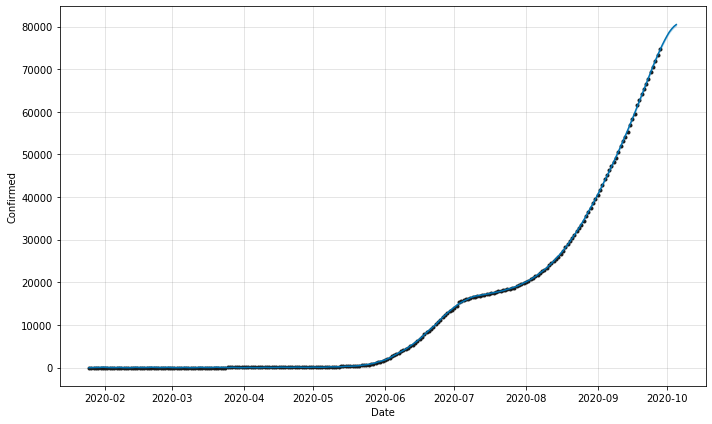

In [51]:
confirmed_forecast_plot = c.plot(confirmed_forecast, xlabel = 'Date', ylabel='Confirmed')

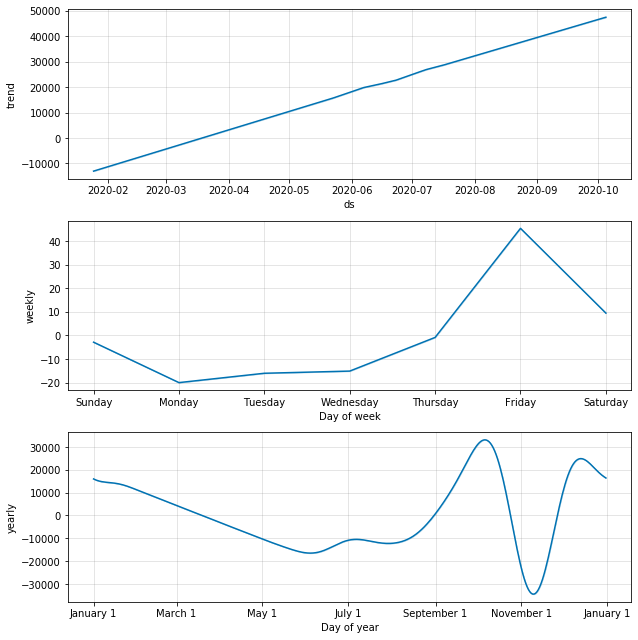

In [52]:
confirmed_forecast_plot = c.plot_components(confirmed_forecast)

#For Death Cases

In [53]:
death.columns = ['ds','y']
death['ds'] = pd.to_datetime(death['ds'])

In [54]:
death.tail()

ds    y
243 2020-09-24  453
244 2020-09-25  459
245 2020-09-26  467
246 2020-09-27  477
247 2020-09-28  481

In [55]:
d = Prophet(interval_width=0.95,yearly_seasonality = True, seasonality_prior_scale=0.1)
d.fit(death)
death_future = d.make_future_dataframe(periods=7,include_history = True)
death_future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
250 2020-10-01
251 2020-10-02
252 2020-10-03
253 2020-10-04
254 2020-10-05

In [56]:
death_forecast = d.predict(death_future)
death_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
250 2020-10-01  513.243246  509.807696  516.709207
251 2020-10-02  522.283391  518.515569  525.951052
252 2020-10-03  531.136232  527.962937  534.673604
253 2020-10-04  538.981934  535.563732  542.431825
254 2020-10-05  546.518163  543.168243  550.101347

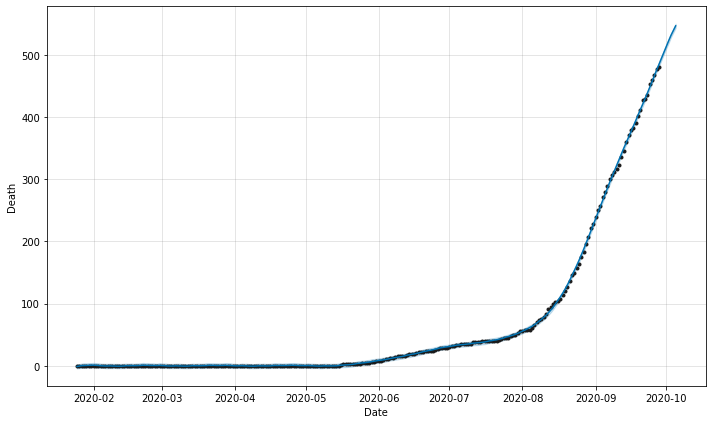

In [57]:
death_forecast_plot = d.plot(death_forecast,xlabel = 'Date', ylabel='Death')

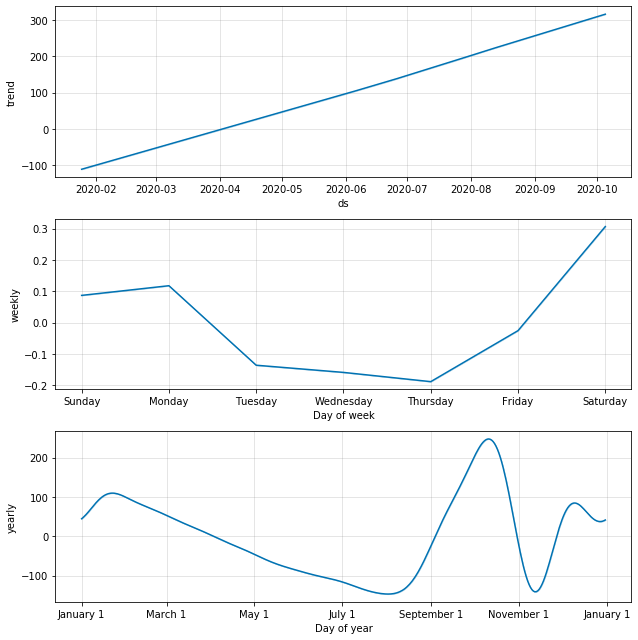

In [58]:
death_forecast_plot = d.plot_components(death_forecast)

#For Recovered Cases

In [59]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [60]:
recovered.tail()

ds      y
243 2020-09-24  50411
244 2020-09-25  51866
245 2020-09-26  53013
246 2020-09-27  53898
247 2020-09-28  54640

In [61]:
r = Prophet(interval_width=0.95,yearly_seasonality = True, seasonality_prior_scale=0.1)
r.fit(recovered)
recovered_future = r.make_future_dataframe(periods=7,include_history = True)
recovered_future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
250 2020-10-01
251 2020-10-02
252 2020-10-03
253 2020-10-04
254 2020-10-05

In [62]:
recovered_forecast = r.predict(recovered_future)
recovered_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
250 2020-10-01  58040.306667  57424.624710  58650.331130
251 2020-10-02  59406.288320  58740.080038  60050.028046
252 2020-10-03  60896.450878  60244.101286  61556.325851
253 2020-10-04  62503.927268  61864.370900  63151.622681
254 2020-10-05  64331.545021  63667.626466  64935.110032

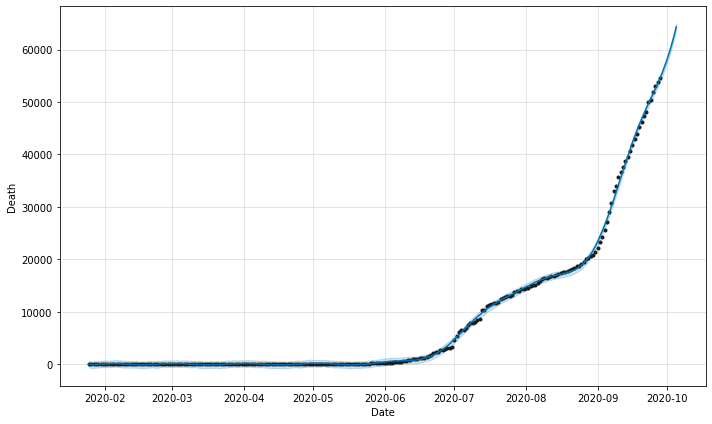

In [63]:
recovered_forecast_plot = r.plot(recovered_forecast,xlabel = 'Date', ylabel='Death')

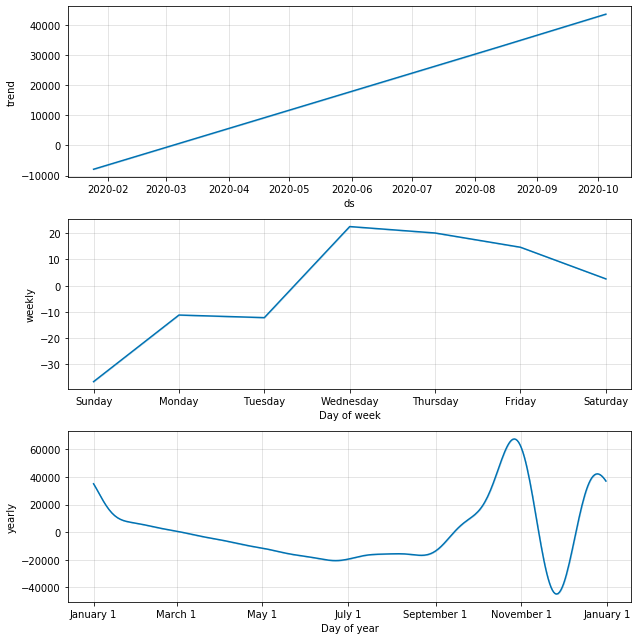

In [64]:
recovered_forecast_plot = r.plot_components(recovered_forecast)

#For Active Cases`

In [65]:
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])

In [66]:
active.tail()

ds      y
243 2020-09-24  18437
244 2020-09-25  18289
245 2020-09-26  18341
246 2020-09-27  19019
247 2020-09-28  19624

In [67]:
a = Prophet(interval_width=0.95,yearly_seasonality = True, seasonality_prior_scale=0.1)
a.fit(active)
active_future = a.make_future_dataframe(periods=7,include_history = True)
active_future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
250 2020-10-01
251 2020-10-02
252 2020-10-03
253 2020-10-04
254 2020-10-05

In [68]:
active_forecast = a.predict(active_future)
active_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
250 2020-10-01  21737.004269  20867.326405  22597.362966
251 2020-10-02  22243.054122  21434.006656  23055.665766
252 2020-10-03  22599.483643  21769.466334  23447.654877
253 2020-10-04  22941.158851  22122.583430  23734.304346
254 2020-10-05  23114.850207  22284.548632  23940.746133

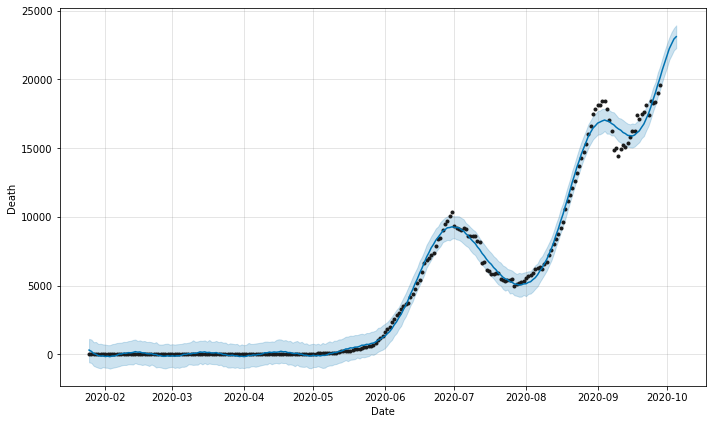

In [69]:
active_forecast_plot = a.plot(active_forecast,xlabel = 'Date', ylabel='Death')

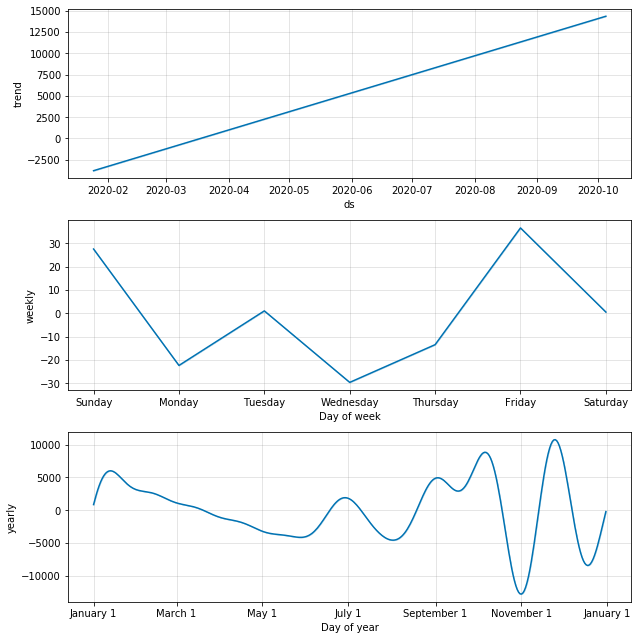

In [70]:
active_forecast_plot = a.plot_components(active_forecast)